In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
train = pd.read_csv('train.csv')   # for training purpose
test = pd.read_csv('test.csv')     # for testing purpose

In [63]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
train.shape

# label col represents which digit's picture is this...
# the rest 784 columns represent total no of pixels of an img
# 784 p = (28 x 28)p = 28p in row x 28p in col

(42000, 785)

In [65]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test.shape

(28000, 784)

# **label of row no 0 shows it contains the img of digit 1. Let's visualize how it looks..**

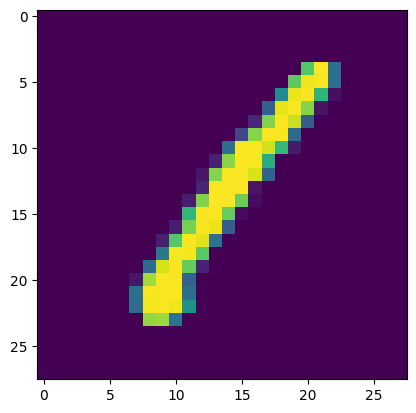

In [67]:
num1 = np.array(train.iloc[0, 1:]).reshape(28, 28)
plt.imshow(num1)    # plotting a numpy array using matplotlib
plt.show()

# **label of row no 3 shows it contains the img of digit 4. Let's visualize how it looks..**

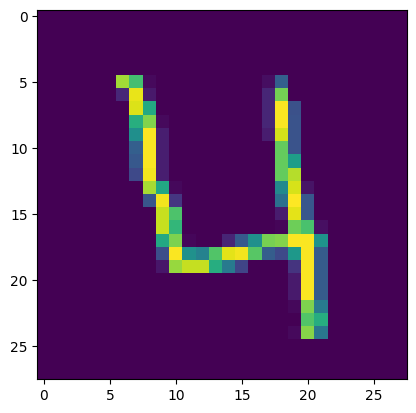

In [68]:
num2 = np.array(train.iloc[3, 1:]).reshape(28, 28)
plt.imshow(num2)
plt.show()

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

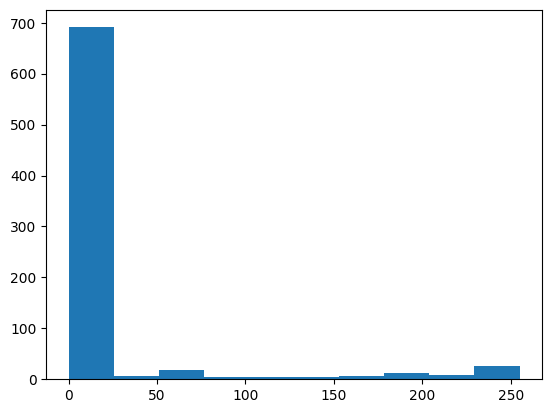

In [69]:
arr = train.iloc[3, 1:]
plt.hist(arr)

In [70]:
x = np.array(train)
y = np.array(test)

In [71]:
X_train = x[:, 1:]
Y_train = x[:, 0]
X_test = y

# **Feature Engineering : In case of computer vision, we don't use the previously used methods for feature engineering. Rather we use a library called keras where the functionalities like zoom, rotate, shear, shift etc. are needed to be passed**

In [72]:
from keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1, 28, 28, 1)

In [73]:
DataGen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    shear_range = 0.1
)

In [74]:
DataGen.fit(X_train)

In [75]:
X_train = X_train.reshape(-1, 784)

# **Model Training**

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

# **Prediction**

In [78]:
int(knn.predict(X_test[100].reshape(1, -1)))

# model's prediction in the 100th row there's 0 digit

0

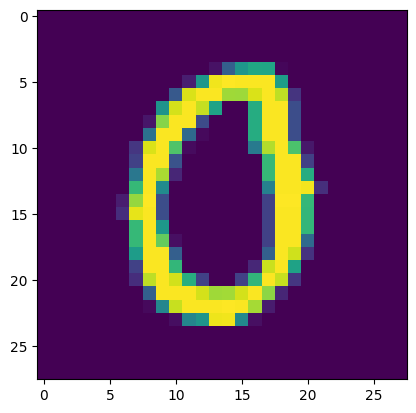

In [79]:
# let's verify with the real dataset if it's correct or not

num2 = np.array(test.iloc[100, :]).reshape(28, 28)
plt.imshow(num2)
plt.show()

In [80]:
int(knn.predict(X_test[104].reshape(1, -1)))

# model's prediction in the 104th row there's 7 digit

7

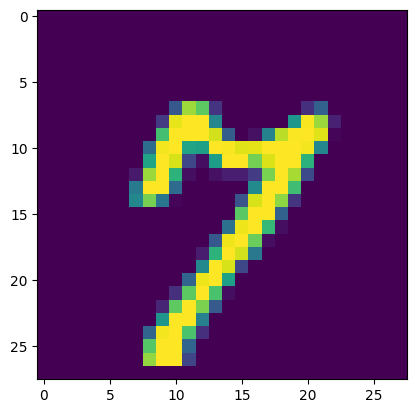

In [82]:
# let's verify with the real dataset if it's correct or not

num2 = np.array(test.iloc[104, :]).reshape(28, 28)
plt.imshow(num2)
plt.show()